In [2]:
import numpy as np
import math
import matplotlib.pyplot as plt
import pandas as pd
from scipy.stats import qmc
from scipy.stats import norm

Grundsätzliche Parameter festlegen

In [32]:
T = 1
d = 50
delta_t = T/d

S_0 = 100
mu = 0.045
sigma = 0.3

mc_runs = 100


Standard Brownian Motion Simulation

In [18]:
def create_standard_bm(d, delta_t):
    #create lower trinangular matrix with ones
    BM = np.empty([mc_runs,d])
    for i in range(mc_runs):
        lower_tri_matr = np.tril(np.ones([d,d]))
        A = math.sqrt(delta_t)*lower_tri_matr
        #create Brownian motion
        BM[i,:] = A.dot(np.random.normal(0,1,d))

    return BM

Create Asset prices

In [21]:
def create_asset_prices(d, delta_t, S_0, mu, sigma):
    S = np.empty([mc_runs, d+1]) #+1 weil d mal simuliert wird und aber der Startpreis des Assets auch in dem Vektor steht
    
    S[:,0] = S_0

    BM = create_standard_bm(d, delta_t)  #w_0 ist nciht dabei aber interessiert mich auch nicht

    for k in range(mc_runs):
        for i in range(d):
            S[k, i+1] = S[k, 0]*np.exp(sigma*BM[k, i] + (mu-(sigma**2)/2)*(i+1)*delta_t)
    return S
    

Calculate Payoff

In [35]:
def ratched_option(d, delta_t, S_0, mu, sigma): 
    S = create_asset_prices(d, delta_t, S_0, mu, sigma)

    #display(S)
    #indic = np.array([1 if s > 0 else 0 for s in np.diff(S)])
    indic = np.diff(S)>0
    #display(indic)
    #display(S[1:S.size])
    payoff = (indic*S[:,1:S.size]).mean(axis=1)  #python spezifisch fehlt dann das erste Element
    #display(payoff)
    #display(S)
    #display(S[1:(S.size)])
    #display(payoff)

    plt.plot(S.T)
    plt.title("Simulation of "+str(mc_runs)+" sample paths of Asset Prices ")
    plt.show()
    return payoff

# Monte Carlo Simulation

Exaktes Ergebnis

In [33]:
Exp = (S_0/d)*norm.cdf((mu-((sigma**2)/2))*math.sqrt(delta_t)/sigma+sigma*math.sqrt(delta_t))*np.sum(np.exp(mu*delta_t*(np.array(range(d))+1)))
display(Exp)

52.89657292927848

Monte Carlo Simulation with Standard BM

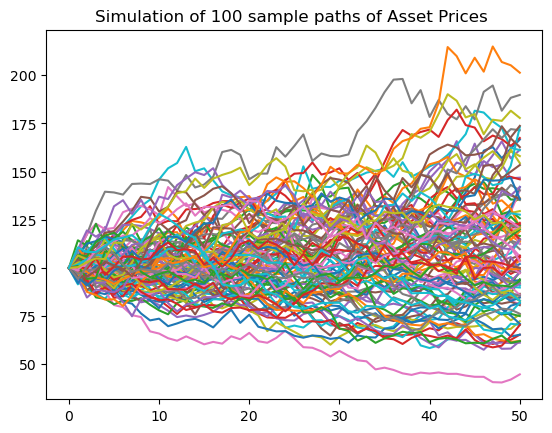

56.12051194987202

In [36]:
mc_expectation = ratched_option(d, delta_t, S_0, mu, sigma).mean()
mc_expectation
